In [28]:
### ome.tif to tif convert
from PIL import Image
import numpy as np
import os
import glob
import tifffile

In [29]:
def read_mp_tiff(path):
    """
    Args:
        path (str) : path to the images, e.g. `/path/to/stacks/img.png`

    Returns:
        image (np.ndarray): image, DHWC
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

In [30]:
# Set input and output folder paths
input_folder = r"N:\EngelhardtGroup\Honghong\from Pauline\20210525_EK_CF_PH\210525_Doc1_14-33-21"
output_folder = r"N:\EngelhardtGroup\Honghong\from Pauline\20210525_EK_CF_PH\210525_Doc1_14-33-21_non"

os.makedirs(output_folder, exist_ok=True)

# Get all .ome.tif files in the input folder
input_files = glob.glob(os.path.join(input_folder, "*.ome.tif"))

# Iterate over each file and save it as a .tif file
for i, input_file in enumerate(input_files):
    print(i, end='\r')
    # Open the .ome.tif file
    data = read_mp_tiff(input_file)
    output_filename = os.path.join(output_folder, os.path.splitext(os.path.basename(input_file))[0] + ".tif")

    # Save as a new .tif file
    tifffile.imwrite(output_filename, data)

In [16]:
#Comparison of effect images before and after training
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os.path
import seaborn as sns 
sns.set()
import contextlib
#from seaborn import _statistics 
import glob

In [17]:
def tiffread(path):
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

In [18]:
def show_images_mip(ims, ims_name = 'ims_smooth', scale=6):
    n = len(ims)
    fig, ax = plt.subplots(1, n, figsize=(scale*n, scale*1))
    for ax_i, im_i in zip(ax, ims):
        #plt.axis('off')
        ax_i.grid(False)
        
        ax_i.imshow(im_i.max(axis=0), vmin=200, vmax=5000, cmap='gray')        # vmin=.., vmax=...
    plt.show()
  #plt.savefig(f'{ims_name}')
    plt.close()

In [19]:
#befroe
%cd  N:\EngelhardtGroup\Honghong\2PM data\mul_220706_result

N:\EngelhardtGroup\Honghong\2PM data\mul_220706_result


In [14]:
%cd  N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_non

N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_non


In [20]:
time = '*0001*.tif'
ims = [tiffread(im_i) for im_i in sorted(glob.glob(time))]

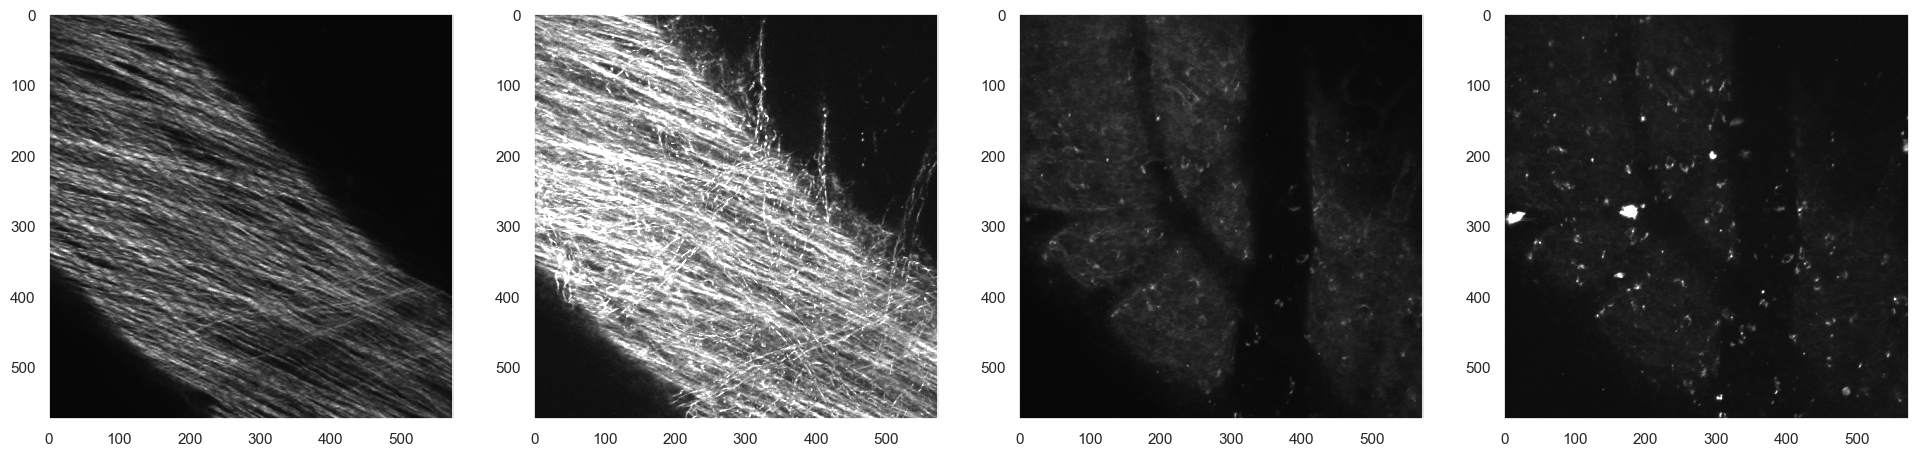

In [21]:
show_images_mip(ims)

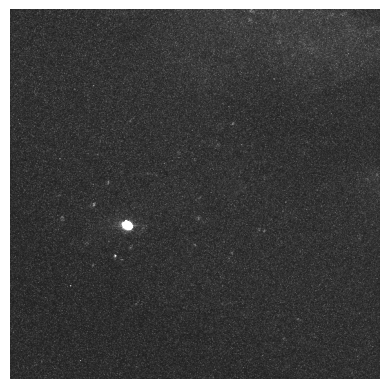

In [27]:
#single image
#before
time = r"N:\EngelhardtGroup\Honghong\2PM data\Josy_trafficking\20220715_EK_MV_SG_JM\220715_Doc1_15-00-08__pos_1\15-00-08_Doc1_PMT - PMT [7FarRED] _C03_Time Time0000.ome.tif"
ims = tiffread(time)
plt.imshow(ims.max(axis=0), vmin=50, vmax=3000, cmap='gray')
plt.grid(False)
plt.axis('off') 
plt.show()

In [46]:
# 3d =================================>>>>>>>>>>>>> 2d
import os
import numpy as np
from PIL import Image

def tiffread(path):
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

# Set the directory where the 3D images are stored
input_dir = r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0"

# Set the directory where the 2D images will be saved
output_dir = r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d"

# Get a list of all the 3D image files in the input directory
input_files = os.listdir(input_dir)
input_files = [f for f in input_files if f.endswith('.tif')]

# Loop over each input file
for input_file in input_files:   
    # Load the 3D image as a numpy array
    img_3d = np.array(tiffread(os.path.join(input_dir, input_file)))   
    # Loop over each slice in the 3D image
    for i, img_2d in enumerate(img_3d):        
        # Save the slice as a 2D image file
        output_file = os.path.splitext(input_file)[0] + "_frame{:03d}.tif".format(i+1)
        output_path = os.path.join(output_dir, output_file)
        Image.fromarray(img_2d).save(output_path)

In [22]:
## .tif ==========>>>>.png
from PIL import Image
import os

# 设置输入和输出文件夹
input_folder = r"N:\EngelhardtGroup\Honghong\2PM data\2018_10_31_CX3CR1 GFP_CCR2 RFP_PECAM-1 cells_MV_NH\final"
output_folder = r"N:\EngelhardtGroup\Honghong\2PM data\2018_10_31_CX3CR1 GFP_CCR2 RFP_PECAM-1 cells_MV_NH\final"

# 遍历文件夹中的.tif文件并转换为.png格式
for filename in os.listdir(input_folder):
    if filename.endswith(".tif"):
        # 打开.tif文件
        tif_image = Image.open(os.path.join(input_folder, filename))
        # 转换为.png格式并保存到输出文件夹
        png_filename = os.path.splitext(filename)[0] + ".png"
        tif_image.save(os.path.join(output_folder, png_filename))


In [72]:
# 3d=================>>>>>>>>>>>>4d add channel
#contraact 3d from 2d
import numpy as np
from PIL import Image
from tifffile import TiffWriter
path_1=r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\15-23-50_Doc1_PMT - PMT [5GREEN] _C01_Time Time0000.ome.tif"
path_2=r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\15-23-50_Doc1_PMT - PMT [6RED] _C02_Time Time0000.ome.tif"
image1 = np.array(Image.open(path_1))
image2 = np.array(Image.open(path_2))

(512, 512)

In [52]:
def tiffread(path):
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

In [141]:
path_1=r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\15-23-50_Doc1_PMT - PMT [5GREEN] _C01_Time Time0000.ome.tif"
path_2=r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\15-23-50_Doc1_PMT - PMT [6RED] _C02_Time Time0000.ome.tif"
image1=tiffread(path_1)
image2=tiffread(path_2)
combined_image = np.stack([image1, image2], axis=-1)
print(combined_image.shape)

(111, 512, 512, 2)


In [ ]:
frames = []
for p in range(combined_image.shape[0]):
    frame = combined_image[p]#111 个（512,512,2）
    frame = [Image.fromarray(frame[:, :, i]) for i in range(frame.shape[2])]
    frames.append(np.stack([np.array(f) for f in frame], axis=-1))
with TiffWriter(r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\combined_image.tif") as tif:
    tif.save(np.stack(frames))

In [1]:
from tifffile import imread
combined_image = imread(r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\combined_image.tif")
print(combined_image.shape)

(111, 512, 512, 2)


In [138]:
combined_image.shape

(111, 512, 512, 2)

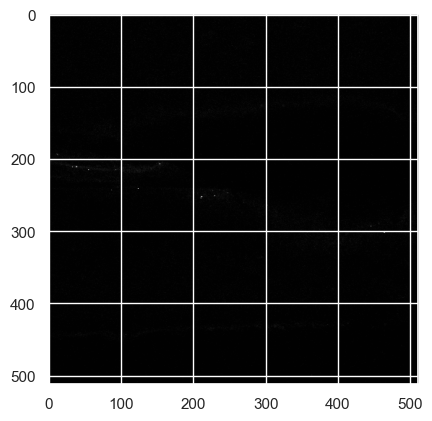

In [136]:
from tifffile import imread
import matplotlib.pyplot as plt

# Load the TIFF image
combined_image = imread(r"N:\EngelhardtGroup\Honghong\2PM data\CX3CR1_VEcad_Aqp4\20220613_EB_MV_PH\220613_Doc1_15-23-50\combined_image.tif")

# Display the first image in the stack
plt.imshow(combined_image[11, :, :, 1], cmap='gray')
plt.show()


In [12]:
cd N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d

N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d


In [13]:
ls

 Volume in drive N is E-C2-TKI
 Volume Serial Number is CF3D-1413

 Directory of N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d

04/14/2023  01:51 PM    <DIR>          .
04/14/2023  01:51 PM    <DIR>          ..
04/14/2023  11:13 AM    <DIR>          blue
04/14/2023  11:19 AM    <DIR>          farred
04/14/2023  11:15 AM    <DIR>          green
04/14/2023  01:51 PM    <DIR>          merged
04/14/2023  11:17 AM    <DIR>          red
               0 File(s)              0 bytes
               7 Dir(s)  2,098,027,036,672 bytes free


In [19]:
#2d frame add channel ===========================>>>>>>>>>>>>>>>>>3d Single
import numpy as np
from PIL import Image

def load_image(filename):
    img = Image.open(filename)
    img_data = np.array(img, dtype=np.float32)
    return img_data

image_filenames = [r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\blue\15-16-29_Doc1_PMT - PMT [2BLUE] _C00_Time Time0000.ome_frame001.tif",
                   r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\green\15-16-29_Doc1_PMT - PMT [5GREEN] _C01_Time Time0000.ome_frame001.tif",
                   r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\red\15-16-29_Doc1_PMT - PMT [6RED] _C02_Time Time0000.ome_frame001.tif",
                   r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\farred\15-16-29_Doc1_PMT - PMT [7FarRED] _C03_Time Time0000.ome_frame001.tif"]
images = [load_image(filename) for filename in image_filenames]
image_array = np.stack(images, axis=-1)

image = Image.fromarray(image_array.astype(np.uint8))

image.save(r'N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\merged\Time0000.ome_frame001.tif')

In [11]:
# 1-9 10-26 分开来做
import numpy as np
from PIL import Image

def load_image(filename):
    img = Image.open(filename)
    img_data = np.array(img, dtype=np.float32)
    return img_data
for i in range(1,10):
    image_filenames = [r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\blue\15-16-29_Doc1_PMT - PMT [2BLUE] _C00_Time Time0003.ome_frame00%d.tif" % i,
                   r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\green\15-16-29_Doc1_PMT - PMT [5GREEN] _C01_Time Time0003.ome_frame00%d.tif" % i,
                   r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\red\15-16-29_Doc1_PMT - PMT [6RED] _C02_Time Time0003.ome_frame00%d.tif" % i,
                   r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\farred\15-16-29_Doc1_PMT - PMT [7FarRED] _C03_Time Time0003.ome_frame00%d.tif" % i]
    images = [load_image(filename) for filename in image_filenames]
    image_array = np.stack(images, axis=-1)

    image = Image.fromarray(image_array.astype(np.uint8))

    image.save(r'N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_2d\merged\Time0003.ome_frame00%d.tif' % i)

In [3]:
from tifffile import imread
combined_image = imread(r"N:\EngelhardtGroup\Honghong\2PM data\220706_Doc1_15-16-29__pos_0_non\15-16-29_Doc1_PMT - PMT [2BLUE] _C00_Time Time0000.ome.tif")
print(combined_image.shape)

(26, 574, 574)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Replace these lines with your actual images
image1 = np.random.rand(H, W)
image2 = np.random.rand(H, W)
image3 = np.random.rand(H, W)

# Stack the images along the third axis
stacked_images = np.stack((image1, image2, image3), axis=-1)
# Create a mixing matrix
mixing_matrix = np.random.rand(F, C)

# Apply the mixing matrix to the stacked images
mixed_images = np.dot(stacked_images, mixing_matrix)
# Calculate the noise level (e.g., 10% of the max signal value)
noise_level = 0.1 * np.max(mixed_images)

# Add Poisson noise to each channel
noisy_mixed_images = mixed_images + np.random.poisson(noise_level, mixed_images.shape)
from sklearn.decomposition import NMF

# Initialize the NMF model
model = NMF(n_components=F, init='random', random_state=0)

# Fit the model and transform the noisy mixed images
unmixed_images = model.fit_transform(noisy_mixed_images.reshape(-1, C)).reshape(H, W, F)


2

In [34]:
pool=(2,2)
len(pool)

2